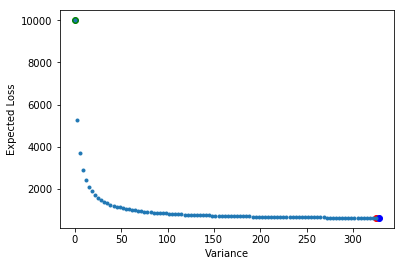

In [3]:
import matplotlib.pyplot as plt

import random
import math
import numpy as np

def perm_impact(x, gamma):
    return x*gamma

def temp_impact(x, epsilon, eta ):
    return epsilon*np.sign(x) + eta*x 

def expected_impact(x, tau, gamma, epsilon, eta):
    
    dx = - np.diff(x) 
    g = [perm_impact(dx[i]/tau, gamma)  for i in range(len(dx))]
    h = [temp_impact(dx[i]/tau, epsilon, eta)  for i in range(len(dx))]
    return tau*np.dot(g, x[1:]) + np.dot(h,dx)
    

def variance_impact(x,sigma,tau):
    return sigma*sigma*tau*np.dot(x[1:],x[1:])


def optimal_frontier(X0,T,lam,tau,gamma,epsilon,eta,sigma):
    kappa = np.sqrt((lam*sigma**2)/eta)
    t05 = np.tanh(0.5*kappa*tau)
    s1 = np.sinh(kappa*tau)
    s1T = np.sinh(kappa*T)
    s2T = np.sinh(2*kappa*T)
    c1 = np.cosh(kappa*(T-tau))
    expected_loss = 0.5*gamma*X0**2+epsilon*X0+eta*X0**2*(t05*(tau*s2T+2*T*s1))/(2*tau**2*s1T**2)
    variance_loss = 0.5*sigma**2*X0**2*(tau*s1T*c1-T*s1)/(s1T**2*s1)
    return expected_loss, variance_loss
    

steps = 100
X0 = 100 

x = [X0 - i*X0/(steps-1)   for i in range(steps)]

lam = 0.0001
tau = 0.1
gamma = 0.1
epsilon = 0.1
eta = 0.1
sigma = 0.1

E1 = expected_impact(x, tau, gamma, epsilon, eta)
V1 = variance_impact(x,sigma,tau)

x = [0   for i in range(steps)]
x[0] = X0

E2 = expected_impact(x, tau, gamma, epsilon, eta)
V2 = variance_impact(x,sigma,tau)

E3, V3 = optimal_frontier(X0,steps*tau,lam,tau,gamma,epsilon,eta,sigma)

Elist = []
Vlist = []

order_executions = steps 
for i in range(order_executions-1):
    eff_steps = i+1 
    x = [X0 - (k*(k <eff_steps) + (eff_steps) *(k>=eff_steps) ) *X0/(eff_steps)   for k in range(steps)]
    E = expected_impact(x, tau, gamma, epsilon, eta)
    V = variance_impact(x,sigma,tau)
    Elist.append(E)
    Vlist.append(V)
    
     
plt.plot(V1,E1,'r-o')
plt.plot(V2,E2,'g-o')
plt.plot(V3,E3,'b-o')

    
plt.plot(Vlist,Elist,'.')

plt.xlabel('Variance')
plt.ylabel('Expected Loss');


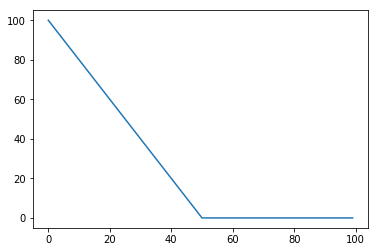

In [4]:
#Example of order execution 

eff_steps = steps/2
x = [X0 - (k*(k <eff_steps) + (eff_steps) *(k>=eff_steps) ) *X0/(eff_steps)   for k in range(steps)]

plt.plot(x)